##### **Análise exploratória (EDA) e Manipulação de dados com o intuito de gerar insights a respeito de um pequeno dataset sobre dinossauros (maioria de variáveis categóricas).**
##### O dataset foi obtido a partir de um processo de webscraping de outro usuário (https://github.com/kjanjua26/jurassic-park), ao qual eu descobri aleatoriamente. Assim, curioso e obcecado por dinossauros, resolvi unir o útil ao agradável e aprimorar meu conhecimento em EDA com um assunto que me agrada. Como é um dataset pequeno e majoritariamente constituído de variáveis qualitativas, trabalhei apenas na geração de insights, sem aplicar nenhum modelo preditivo.

##### O pequeno projeto aprimorou minhas skills na manipulação de dados e ampliou minha capacidade de gerar análises visualmente interessantes. O interessante da análise com Python é que, diferente de outras ferramentas, como Excel/Bi/Tableau, você tem uma maior versatilidade na hora de manipular/separar/excluir dados, além do potencial de análises preditivas, o que faz com que o conhecimento da linguagem torne-se muito positivo para quem gosta de trabalhar analisando dados.

<center><img style="-webkit-user-select: none;margin: auto;cursor: zoom-in;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://naturalsciences.org/calendar/wp-content/uploads/2020/11/DD-Press-Release-Art-Copyright-FriendsNCMNS_1920x960-1.jpg" width="1200" height="600" ></center>

É de praxe começar importando bibliotecas de frequente uso.

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [233]:
df = pd.read_csv("data.csv")
df.head(5)

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...


Verificamos algumas informações sobre a tabela.

In [234]:
df.columns

Index(['name', 'diet', 'period', 'lived_in', 'type', 'length', 'taxonomy',
       'named_by', 'species', 'link'],
      dtype='object')

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      309 non-null    object
 1   diet      309 non-null    object
 2   period    309 non-null    object
 3   lived_in  308 non-null    object
 4   type      309 non-null    object
 5   length    291 non-null    object
 6   taxonomy  309 non-null    object
 7   named_by  309 non-null    object
 8   species   304 non-null    object
 9   link      309 non-null    object
dtypes: object(10)
memory usage: 24.3+ KB


Podemos verificar o tamanho e algumas informações de nosso dataset.  
Constitui-se majoritariamente de dados qualitativos, porém temos uma coluna chamada comprimento (length), o que pode indicar ser uma variável quantitativa (numérica).

In [236]:
nRow, nCol = df.shape
print(f'Temos {nRow} linhas e  {nCol} colunas')
print('\n')
print(df.info())

Temos 309 linhas e  10 colunas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      309 non-null    object
 1   diet      309 non-null    object
 2   period    309 non-null    object
 3   lived_in  308 non-null    object
 4   type      309 non-null    object
 5   length    291 non-null    object
 6   taxonomy  309 non-null    object
 7   named_by  309 non-null    object
 8   species   304 non-null    object
 9   link      309 non-null    object
dtypes: object(10)
memory usage: 24.3+ KB
None


In [237]:
df.isna().sum() #alguns dados faltantes, é sempre bom procurar uma maneira de tratá-los logo que possível, embora eu não tenha feito isso nesse momento.

name         0
diet         0
period       0
lived_in     1
type         0
length      18
taxonomy     0
named_by     0
species      5
link         0
dtype: int64

É possível isolar uma variável de interesse e aplicar alguma função em cima dela, como no caso value_counts, para visualizarmos como os dados dessa coluna se agrupam.

In [238]:
s = df['diet']
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
s = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})[:5]
print(s)

                        counts       per per100
herbivorous                185  0.598706  59.9%
carnivorous                 94  0.304207  30.4%
omnivorous                  27  0.087379   8.7%
unknown                      2  0.006472   0.6%
herbivorous/omnivorous       1  0.003236   0.3%


A partir de agora podemos partir para análise gráfica. Vamos começar com a variável "diet".  
Na tabela acima percebemos que alguns dados podem não acrescentar valor à análise, como "unkown" e "herbivorous/omnivorous".  
Como é apenas uma análise exploratória, não há tanto problema em excluir dados desta maneira.

[]

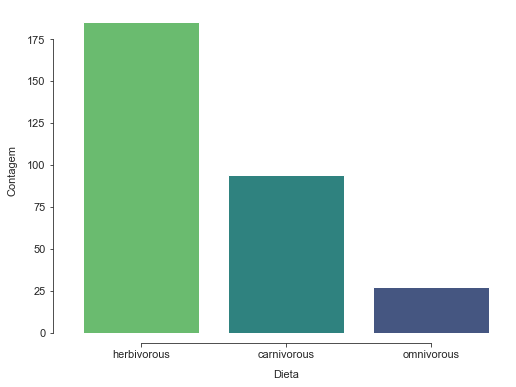

In [239]:
df.drop(df[df['diet'] == "unknown"].index, inplace = True)  #dropando variáveis sem significância
df.drop(df[df['diet'] == "herbivorous/omnivorous"].index, inplace = True)

df['diet'].value_counts() #contando os conjuntos dentro dessa variável

sns.set_style("ticks")
plt.figure(figsize = (8, 6))
sns.countplot(data=df, x='diet',palette="viridis_r", order=df['diet'].value_counts().index) #construindo um plot de contagem, no eixo x a variável de interesse e no y o porteado da função de contagem
sns.despine(offset=10, trim=True); 

plt.xlabel("Dieta",fontsize=11, labelpad=10)
plt.ylabel("Contagem",fontsize=11, labelpad=10)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.plot()

Podemos perceber que "length" é uma variável quantitativa, porém o fato dela conter uma string(m) acompanhando pode ser um empecilho, dependendo do que se deseja trabalhar em cima desta variável.

In [240]:
df['length'].value_counts()

6.0m     21
2.0m     19
5.0m     19
9.0m     19
3.0m     16
         ..
1.1m      1
0.9m      1
25.0m     1
6.8m      1
4.1m      1
Name: length, Length: 72, dtype: int64

Comprimento
6.0m     0.072664
2.0m     0.065744
5.0m     0.065744
9.0m     0.065744
3.0m     0.055363
           ...   
28.0m    0.003460
4.6m     0.003460
26.0m    0.003460
22.0m    0.003460
4.1m     0.003460
Name: length, Length: 72, dtype: float64


[]

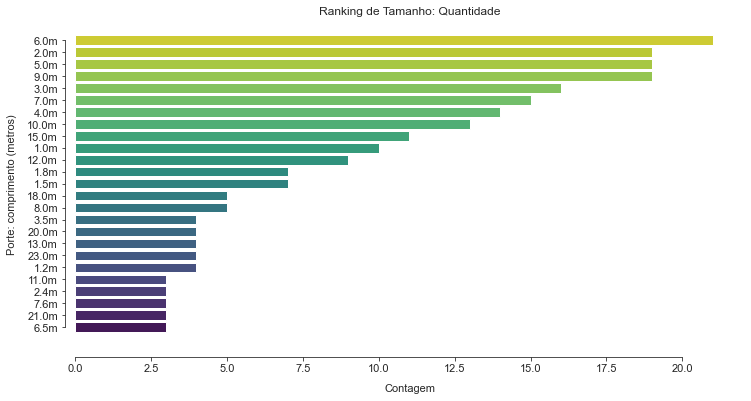

In [241]:
plt.figure(figsize = (12, 6))

print('Comprimento')
print(df['length'].value_counts().sort_values(ascending=False) \
      / df['length'].value_counts().sort_values(ascending=False).sum())

sns.countplot(data=df, y='length', order=df['length'].value_counts().head(25).index, palette="viridis_r")
sns.despine(offset=10, trim=True)
sns.set_style("ticks")

plt.xlabel("Contagem", fontsize=11, labelpad=10)
plt.ylabel("Porte: comprimento (metros)", fontsize=11, labelpad=10)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

plt.title('Ranking de Tamanho: Quantidade')
plt.plot()

Como visto, houve mistura de strings (letras) com int (números).   
Irei dropar a string "m" de type e depois transformar essa variável para numérica   
(talvez isto não fosse necessário para essas análises, mas foi interessante para aprender a usar o método de separação).

In [242]:
df['length'] = df['length'].str.replace('m','')
df['length'] = pd.to_numeric(df['length'])
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      306 non-null    object 
 1   diet      306 non-null    object 
 2   period    306 non-null    object 
 3   lived_in  305 non-null    object 
 4   type      306 non-null    object 
 5   length    289 non-null    float64
 6   taxonomy  306 non-null    object 
 7   named_by  306 non-null    object 
 8   species   301 non-null    object 
 9   link      306 non-null    object 
dtypes: float64(1), object(9)
memory usage: 34.4+ KB


Dropei as colunas taxonomy e link, pois não irei explorá-las.  
Verifiquei os valores max e min da variável length, assim podemos localizar a linha a qual estão contidas esses valores e verificá-los individualmente.

In [243]:
df.drop(['taxonomy',"link"], axis='columns', inplace=True)

print(df['length'][df.length== df.length.max()])
print(df['length'][df.length== df.length.min()])
print("\n")

print(df.loc[74].to_markdown())

30     35.0
273    35.0
Name: length, dtype: float64
74    0.25
Name: length, dtype: float64


|          | 74                                         |
|:---------|:-------------------------------------------|
| name     | confuciusornis                             |
| diet     | carnivorous                                |
| period   | Early Cretaceous 127-121 million years ago |
| lived_in | China                                      |
| type     | small theropod                             |
| length   | 0.25                                       |
| named_by | Hou Zhou Gu and Zhang (1995)               |
| species  | sanctus                                    |


<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Confuciusornis_sanctus_fossil.jpg" alt="Ficheiro:Confuciusornis sanctus fossil.jpg – Wikipédia, a enciclopédia livre" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb" data-noaft="1" style="width: 386px; height: 416.006px; margin: 0px;">

#### Já com essa verificação, podemos ver que a subordem Sauropoda é a que apresenta os maiores indivíduos.

In [244]:
print(df.loc[30].to_markdown())
print("\n")
print(df.loc[273].to_markdown())

|          | 30                                   |
|:---------|:-------------------------------------|
| name     | argentinosaurus                      |
| diet     | herbivorous                          |
| period   | Late Cretaceous 90 million years ago |
| lived_in | Argentina                            |
| type     | sauropod                             |
| length   | 35.0                                 |
| named_by | Bonaparte and Coria (1993)           |
| species  | huinculensis                         |


|          | 273                                        |
|:---------|:-------------------------------------------|
| name     | supersaurus                                |
| diet     | herbivorous                                |
| period   | Early Cretaceous 154-142 million years ago |
| lived_in | USA                                        |
| type     | sauropod                                   |
| length   | 35.0                                       |
| named_by | J

<center><img crossorigin="anonymous" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Longest_dinosaurs2.svg/1280px-Longest_dinosaurs2.svg.png" class="svg mw-mmv-dialog-is-open" width="1186" height="324"><center>

In [245]:
print(np.sort(df['length'].unique())) #verificando a extensão da diversidade de valores

[ 0.25  0.45  0.5   0.6   0.65  0.8   0.9   1.    1.1   1.2   1.3   1.4
  1.5   1.6   1.7   1.8   2.    2.1   2.3   2.37  2.4   2.5   3.    3.4
  3.5   4.    4.1   4.2   4.4   4.5   4.6   4.7   5.    5.3   5.5   5.7
  6.    6.2   6.4   6.5   6.6   6.8   7.    7.4   7.5   7.6   8.    8.1
  8.2   8.5   8.6   9.   10.   11.   12.   12.5  13.   14.   15.   17.
 18.   20.   21.   21.5  22.   23.   24.   25.   26.   28.   30.   35.
   nan]


Podemos fazer um agrupamento dos dados quantitativos de comprimento em grupos qualitativos.  
Resolvi agrupá-los em 5 grupos e depositá-los em uma nova coluna, para facilitar a visualização.   
A presença de muitos grupos normalmente torna difícil a interpretação e perde seu valor didático.

In [246]:
porte = []
for value in df["length"]:
    if value < 1.0:
        porte.append("Muito Pequeno")
    elif 2.5 >= value and value >= 1.0:
        porte.append("Pequeno")
    elif 7.0 >= value and value >= 2.6:
        porte.append("Medio")
    elif 14.0 >= value and value >= 7.1:
        porte.append("Grande")
    elif value > 14.1:
        porte.append("Gigante")
    else:
        porte.append("NAN") #o restante ficará aqui, provavelmente serão erros de preenchimento da coluna

df["porte"] = porte
print(df["porte"])

0       Grande
1       Grande
2        Medio
3        Medio
4       Grande
        ...   
304    Gigante
305      Medio
306      Medio
307    Pequeno
308        NAN
Name: porte, Length: 306, dtype: object


Se temos dados, temos perguntas, e podemos respondê-las procurando relações entre estes dados.  
* Será que existe correlação entre tamanho e dieta? E entre tamanho e as diferentes Subordens?   
* Criarei um gráfico de dispersão para analisar a distribuição dos grupos que acabamos de criar em relação à dieta.  

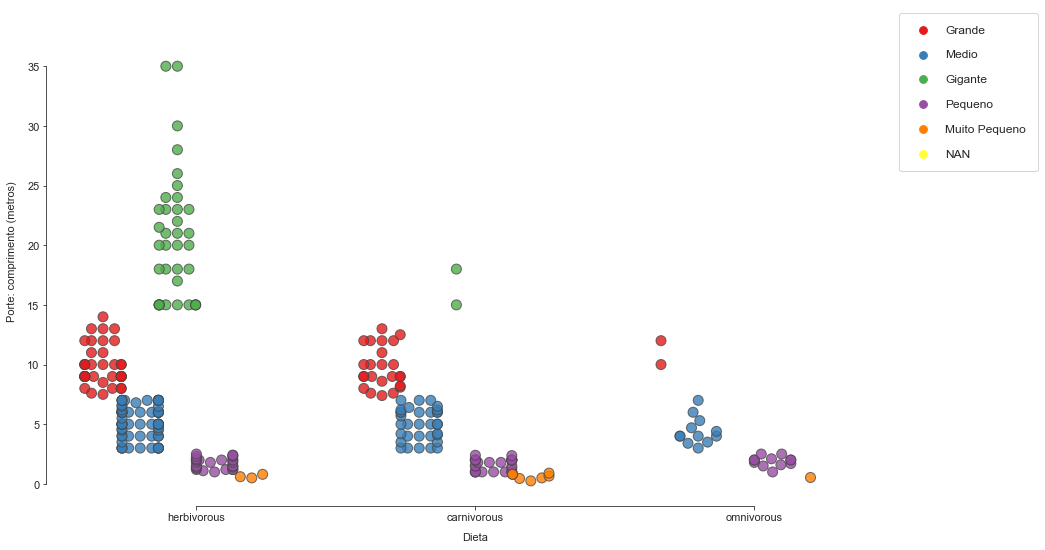

In [247]:
plt.figure(figsize=(15,9))

sns.set_style("ticks")
sns.swarmplot(x='diet', 
              y='length', 
              data=df, 
              hue='porte', 
              split=True, 
              palette="Set1",
              alpha=.8, s=10,linewidth=1.0)

sns.despine(offset=10, trim=True) #estilizando os eixos
 
# Ajustando o tamanho do y
plt.ylim(-1, 40)
 
# Ajustando o tamanho dos dados de cada eixo

plt.xlabel("Dieta", fontsize=11, labelpad=10)
plt.ylabel("Porte: comprimento (metros)", fontsize=11, labelpad=10)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

# Ajustando a legenda
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderpad=1, labelspacing=1.2,fontsize=12)

No gráfico acima podemos perceber que há grande diversidade nos grupos de herbívoros, e nestes apresentando a grande maioria de espécies gigantes.  
Este gráfico nos permite observar a distribuição de uma variável em outra e também a densidade de determinado valor.  
Os pontos mais escuros normalmente expressam maior densidade nessa área; em um dataset maior a densidade tende a tornar-se mais visível.

Podemos tentar analisar qual o padrão de tamanho em relação às Subordens.

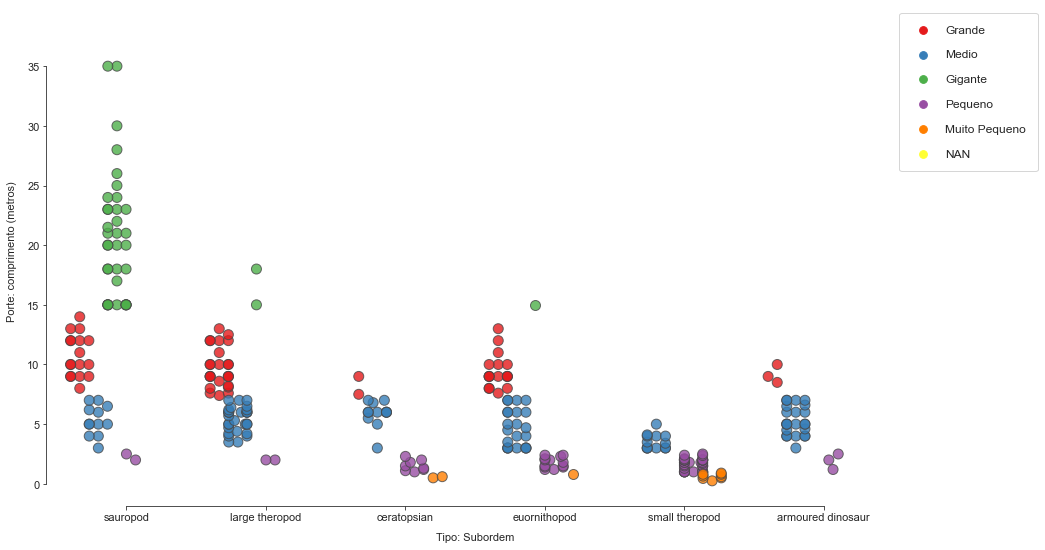

In [248]:
plt.figure(figsize=(15,9))


df.drop(df[df['type'] == "1.0m"].index, inplace = True) # dropando um erro de preenchimento da planilha "type"

sns.set_style("ticks")
sns.swarmplot(x='type', 
              y='length', 
              data=df, 
              hue='porte', 
              split=True, #separando pelo hue
              palette="Set1",
              alpha=.8, s=10,linewidth=1.0)

sns.despine(offset=10, trim=True) #estilizando os eixos
 
# Ajustando o tamanho do y
plt.ylim(-1, 40)
 
# Ajustando o tamanho dos dados de cada eixo

plt.xlabel("Tipo: Subordem", fontsize=11, labelpad=10)
plt.ylabel("Porte: comprimento (metros)", fontsize=11, labelpad=10)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)

# Ajustando a legenda
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderpad=1, labelspacing=1.2,fontsize=12)

<img style="-webkit-user-select: none;margin: auto;cursor: zoom-in;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://upload.wikimedia.org/wikipedia/commons/d/d3/The_dinosaur_book_-_the_ruling_reptiles_and_their_relatives_%281945%29_%2820946946632%29.jpg" width="455" height="600">

#### Um histograma apontando a relação das subordem com a dieta também pode ser interessante visualizar.

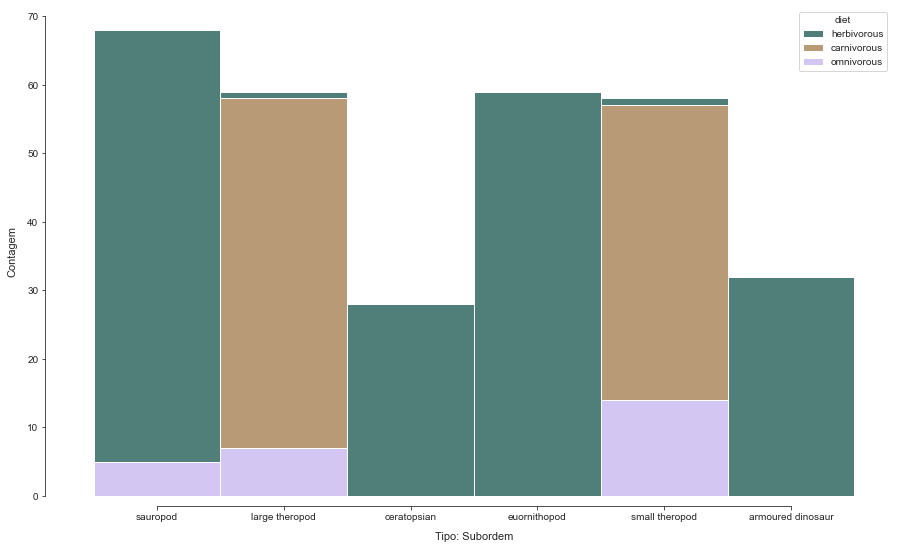

In [ ]:
plt.figure(figsize=(15,9))
sns.histplot(binwidth=0.5, x="type", hue="diet", data=df, stat="count", multiple="stack",palette="cubehelix")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Tipo: Subordem", fontsize=11, labelpad=10)
plt.ylabel("Contagem", fontsize=11, labelpad=10)
sns.despine(offset=10, trim=True)
sns.set_style("ticks")

In [ ]:
# simples análise das variáveis. Podemos ver como a análise torna-se diferente quando temos uma variável quantitativa. 

print(df['type'].describe())
print("\n")
print(df['diet'].describe())
print("\n")
print(df['length'].describe())

count          306
unique           7
top       sauropod
freq            68
Name: type, dtype: object


count             306
unique              3
top       herbivorous
freq              185
Name: diet, dtype: object


count    289.000000
mean       7.229135
std        6.321244
min        0.250000
25%        2.400000
50%        6.000000
75%        9.000000
max       35.000000
Name: length, dtype: float64


Em relação à subordem, quais estão mais presentes no estudo?

Tipos: Subordem
sauropod             0.222222
small theropod       0.192810
euornithopod         0.192810
large theropod       0.192810
armoured dinosaur    0.104575
ceratopsian          0.091503
1.0m                 0.003268
Name: type, dtype: float64


[]

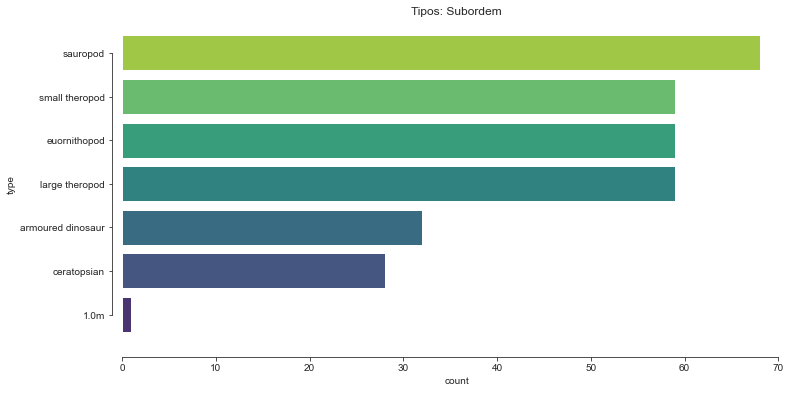

In [ ]:
plt.figure(figsize = (12, 6))
df['type'].value_counts()
print('Tipos: Subordem')
print(df['type'].value_counts().sort_values(ascending=False) \
      / df['type'].value_counts().sort_values(ascending=False).sum())
sns.countplot(data=df, y='type', order=df['type'].value_counts().index, palette="viridis_r")
sns.despine(offset=10, trim=True)
sns.set_style("white")
plt.title('Tipos: Subordem')
plt.plot()

# outro erro no preenchimento da coluna

In [ ]:
#variável com muitas classes, porém a maioria com um exemplar, normal para um banco de espécies.

count = df['species'].value_counts() 
display(count)

mongoliensis       7
giganteus          3
gobiensis          3
armatus            3
gracilis           2
                  ..
amicagraphica      1
prenes             1
australis          1
skarzynskii        1
transsylvanicus    1
Name: species, Length: 268, dtype: int64

In [ ]:
# Podemos procurar por alguma espécie de interesse para sabermos algumas informações

df[df['species'].str.contains("rex")==True]

# Parece que rex (rei) não é um subnome aplicado a somente uma espécie. 🦎  🦖

,name,diet,period,lived_in,type,length,named_by,species,porte
203,othnielia,herbivorous,Late Jurassic 154-142 million years ago,USA,euornithopod,1.4,Marsh (1877),rex,Pequeno
291,tyrannosaurus,carnivorous,Late Cretaceous 68-66 million years ago,USA,large theropod,12.0,Osborn (1905),rex,Grande


<img src="https://static.wikia.nocookie.net/jpl-live-the-legend/images/a/a8/OthnieliaMissDNAJPL.jpg/revision/latest?cb=20140227082926" alt="Othnielia Rex | JPL Live the Legend Wiki | Fandom" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb" data-noaft="1" style="width: 436px; height: 230.858px; margin: 0px;">

In [ ]:
df[df['name'].str.contains("tyrannosaurus")==True]

,name,diet,period,lived_in,type,length,named_by,species,porte
291,tyrannosaurus,carnivorous,Late Cretaceous 68-66 million years ago,USA,large theropod,12.0,Osborn (1905),rex,Grande


Analisando a procedência:
* Será que existiram mais dinossauros em uma região, ou será que aquela região faz mais pesquisas sobre esse nicho?

Proporção de dinossauros por país
USA               0.253289
China             0.157895
Mongolia          0.144737
Argentina         0.082237
United Kingdom    0.069079
Canada            0.046053
Germany           0.026316
Australia         0.019737
Niger             0.019737
South Africa      0.016447
Tanzania          0.016447
Spain             0.016447
Brazil            0.013158
France            0.013158
India             0.013158
Morocco           0.009868
Zimbabwe          0.009868
Madagascar        0.009868
Japan             0.006579
Egypt             0.006579
Russia            0.006579
Uzbekistan        0.006579
Kazakhstan        0.006579
Romania           0.006579
Malawi            0.003289
Wales             0.003289
Antarctica        0.003289
North Africa      0.003289
Tunisia           0.003289
Switzerland       0.003289
Uruguay           0.003289
Name: lived_in, dtype: float64


[]

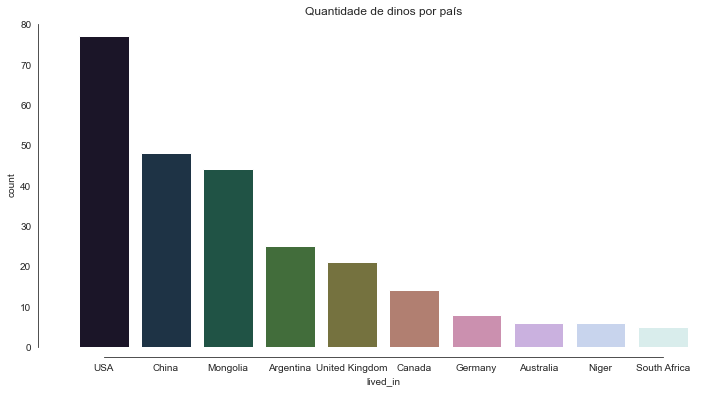

In [ ]:
plt.figure(figsize = (12, 6))
df['lived_in'].value_counts()
print('Proporção de dinossauros por país')
print(df['lived_in'].value_counts().sort_values(ascending=False) \
      / df['lived_in'].value_counts().sort_values(ascending=False).sum())
sns.countplot(data=df, x='lived_in',palette="cubehelix", order=df['lived_in'].value_counts().head(10).index)
sns.despine(offset=10, trim=True)
sns.set_style("whitegrid")
plt.title('Quantidade de dinos por país')
plt.plot()

Análise dos períodos da "Era dos Dinossauros".

Proporção de dinossauros por período
Late Cretaceous 76-74 million years ago       0.045902
Late Cretaceous 84-71 million years ago       0.029508
Early Cretaceous 121-99 million years ago     0.029508
Early Cretaceous 127-121 million years ago    0.029508
Late Jurassic 154-142 million years ago       0.026230
                                                ...   
Early Cretaceous 121-97 million years ago     0.003279
Early Cretaceous 126-142 million years ago    0.003279
Early Jurassic 170 million years ago          0.003279
Late Triassic 205-195 million years ago       0.003279
USA                                           0.003279
Name: period, Length: 151, dtype: float64


[]

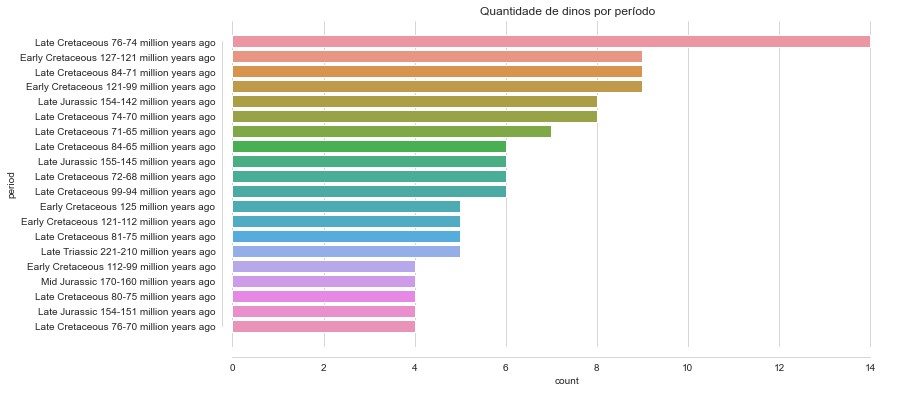

In [ ]:
plt.figure(figsize = (12, 6))
df['period'].value_counts()
print('Proporção de dinossauros por período')
print(df['period'].value_counts().sort_values(ascending=False) \
      / df['period'].value_counts().sort_values(ascending=False).sum())
sns.countplot(data=df, y='period', order=df['period'].value_counts().head(20).index)
sns.despine(offset=10, trim=True)
sns.set_style("ticks")
plt.title('Quantidade de dinos por período')
plt.plot()

Temos muitos períodos similares que divergem em relação a "alguns" milhões de anos (e.g. Early Cretaceous 121-99 million years ago - Early Cretaceous 127-121 million years ago).   
Talvez possamos agrupar alguns espaços de tempo para facilitar a análise.

In [ ]:
df.head(2) #A informação de anos junto dos períodos acaba criando muitos grupos diferentes

,name,diet,period,lived_in,type,length,named_by,species,porte
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,Grande
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0,Bonaparte and Novas (1985),comahuensis,Grande


Clusterizando os períodos em Early, Mid e Late, sem a exatidão dos anos.  
Chamei o método str.split para pegar o que havia antes do 2º espaço e colocar em uma nova coluna.

In [ ]:
df["periodo_grupos"] = df["period"].str.split(" ").str[:2].str.join(" ")
df.head(2)

,name,diet,period,lived_in,type,length,named_by,species,porte,periodo_grupos
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,Grande,Early Jurassic
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0,Bonaparte and Novas (1985),comahuensis,Grande,Late Cretaceous


Proporção de dinossauros por Período
Late Cretaceous     0.449180
Early Cretaceous    0.209836
Late Jurassic       0.140984
Mid Jurassic        0.085246
Early Jurassic      0.062295
Late Triassic       0.049180
USA                 0.003279
Name: periodo_grupos, dtype: float64


[]

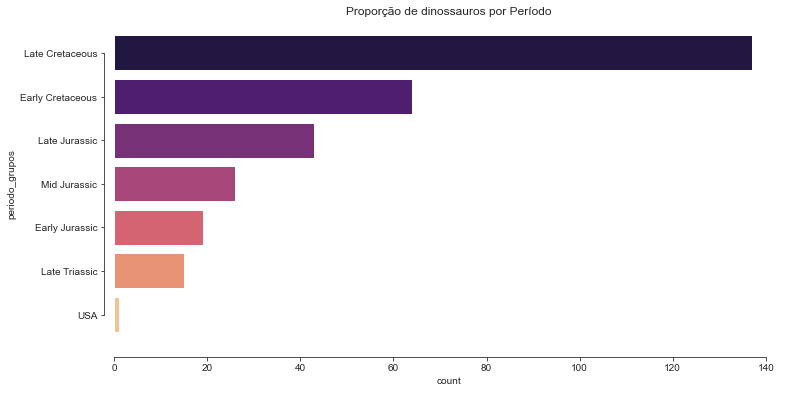

In [ ]:
# Printando contagem (%) e plotando

plt.figure(figsize = (12, 6))
df['periodo_grupos'].value_counts()
print('Proporção de dinossauros por Período')
print(df['periodo_grupos'].value_counts().sort_values(ascending=False) \
      / df['periodo_grupos'].value_counts().sort_values(ascending=False).sum())
sns.countplot(data=df, y='periodo_grupos', order=df['periodo_grupos'].value_counts().index, palette="magma")
sns.despine(offset=10, trim=True);            
sns.set_style("ticks")
plt.title('Proporção de dinossauros por Período')
plt.plot()

# parece que alguém preencheu a coluna period com um dado geográfico xD

<img class="js-lazy image-loaded" src="https://pro2-bar-s3-cdn-cf6.myportfolio.com/87567dd6e258a08aabf2d11940ab6a6a/afcaba50-3e96-486d-ba64-f484bbc9e40d_rw_1920.jpg?h=01451284020b6127350a7c0611e1a4ac" width="1920" srcset="https://pro2-bar-s3-cdn-cf6.myportfolio.com/87567dd6e258a08aabf2d11940ab6a6a/afcaba50-3e96-486d-ba64-f484bbc9e40d_rw_600.jpg?h=8c28f3c4e45ab62c5306b2188cb16586 600w,https://pro2-bar-s3-cdn-cf6.myportfolio.com/87567dd6e258a08aabf2d11940ab6a6a/afcaba50-3e96-486d-ba64-f484bbc9e40d_rw_1200.jpg?h=2acfa69062c61454c1f422047558544e 1200w,https://pro2-bar-s3-cdn-cf6.myportfolio.com/87567dd6e258a08aabf2d11940ab6a6a/afcaba50-3e96-486d-ba64-f484bbc9e40d_rw_1920.jpg?h=01451284020b6127350a7c0611e1a4ac 1920w," sizes="(max-width: 1920px) 100vw, 1300px">

Irei dropar a linha com USA. Poderia ter utilizado uma alternativa melhor para tratamento, e assim não perder aquele dado por causa de um erro, mas foi a medida mais rápida para a plotagem.

In [ ]:
df.drop(df[df['periodo_grupos'] == "USA"].index, inplace = True)

##### Criando um gráfico mais elaborado na visualização dos períodos
* Podemos ver que o Cretáceo foi a era de ouro dos dinossauros, diferente do que se acredita, baseado nos filmes.
* É possível pensar que essa maior quantidade também seja em razão de melhores condições de preservação dos fósseis e outros determinantes.

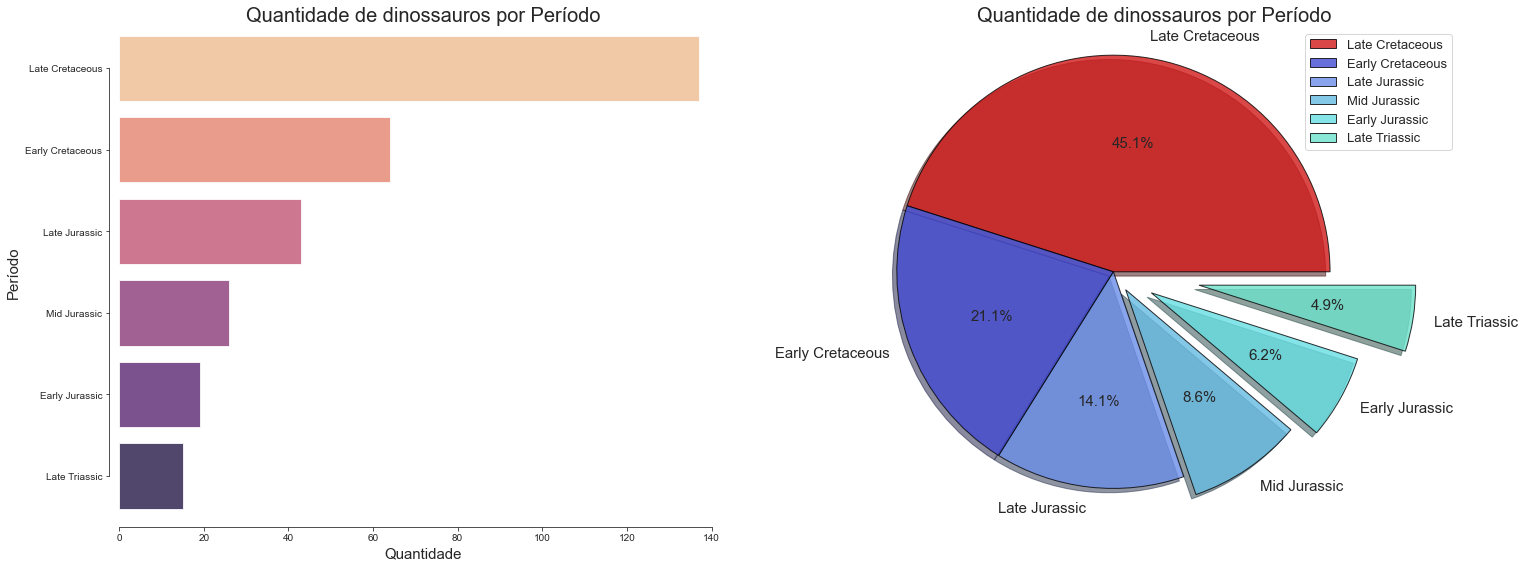

In [ ]:
count = df["periodo_grupos"].value_counts().values
anos = df["periodo_grupos"].value_counts().index


plt.figure(figsize = (24, 9))
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='periodo_grupos', order=df['periodo_grupos'].value_counts().index, palette="magma_r", alpha = 0.8,)
sns.despine(offset=10, trim=True);            
sns.set_style("ticks")
plt.xlabel("Quantidade", fontsize=15)
plt.ylabel("Período", fontsize=15)
plt.title("Quantidade de dinossauros por Período",fontsize=20)
plt.subplot(1, 2, 2)

plt.pie(count,
        autopct='%1.1f%%',
        shadow=True, startangle=0,        
        labels = anos,   
        colors = ["#d11919", "#424ad1", "#6a8ee8", "#66bbe2", "#66dee2", "#6ce2cb", "#6ad187", "#3b7f5b"],
        labeldistance = 1.1, 
        explode = [0, 0,0, .1, .2, .4],
        wedgeprops = {"ec": "k", 'alpha':0.8}, 
        textprops = {"fontsize": 15}, 
        )
        
plt.axis("equal")
plt.title("Quantidade de dinossauros por Período",fontsize=20)
plt.legend(prop={'size': 13})

#### Por último, também podemos explorar os pesquisadores (named_by) mais ativos na área.
* Farei a mesma limpeza de string separando o nome da data.

In [ ]:
df['autor'] = [x.split('(')[0] for x in df['named_by']] #Salvei apenas o que tinha antes do () em uma nova variável
                                                        # porém isso salvou os nomes com um espaço depois da última letra

df['ano'] = df['named_by'].str.extract('(\d+)', expand=False)
df.loc[df['ano'].notnull(), 'ano'] = df.loc[df['ano'].notnull(), 'ano'].apply(int)
df.info()

#outras medidas:

#df['ano'] =df['named_by'].str.replace(r'[^(]*\(|\)[^)]*', '') # Peguei apenas o que tinha dentro do () e coloquei como ano de descoberta, não funcionou bem
#df['ano'] =df['named_by'].apply(lambda st: st[st.find("(")+1:st.find(")")])
#pd.to_datetime(df.ano, format='%Y')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 308
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            304 non-null    object 
 1   diet            304 non-null    object 
 2   period          304 non-null    object 
 3   lived_in        304 non-null    object 
 4   type            304 non-null    object 
 5   length          288 non-null    float64
 6   named_by        304 non-null    object 
 7   species         299 non-null    object 
 8   porte           304 non-null    object 
 9   periodo_grupos  304 non-null    object 
 10  autor           304 non-null    object 
 11  ano             299 non-null    object 
dtypes: float64(1), object(11)
memory usage: 39.0+ KB


In [ ]:
df.head(2)

,name,diet,period,lived_in,type,length,named_by,species,porte,periodo_grupos,autor,ano
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,Grande,Early Jurassic,Yates Bonnan Neveling Chinsamy and Blackbeard ...,2010
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0,Bonaparte and Novas (1985),comahuensis,Grande,Late Cretaceous,Bonaparte and Novas,1985


Quais autores fizeram mais descobertas?

Marsh         16
Brown          8
Osborn         7
Bonaparte      6
Gilmore        6
Lambe          5
Barsbold       5
Young          5
Parks          4
Stromer        3
Name: autor, dtype: int64

[]

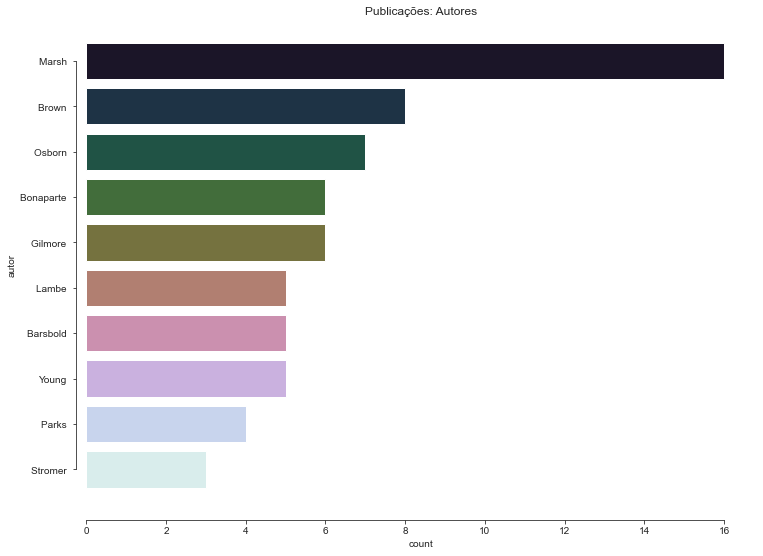

In [ ]:
count = df['autor'].value_counts().head(10)
display(count)

plt.figure(figsize=(12,9))
sns.countplot(data=df, y='autor', order=df['autor'].value_counts().head(10).index, palette="cubehelix")
sns.despine(offset=10, trim=True)
sns.set_style("ticks")
plt.title('Publicações: Autores')
plt.plot()

In [ ]:
count.dtype

dtype('int64')

Podemos verificar os anos de maiores descobertas.

[]

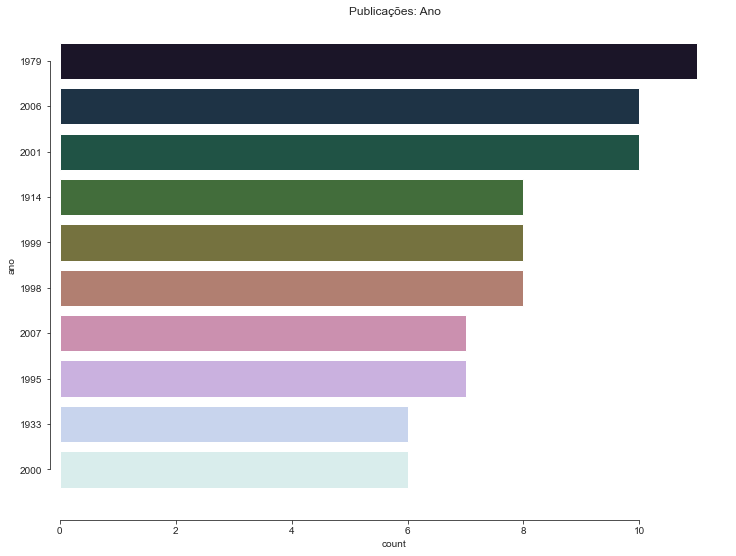

In [ ]:
plt.figure(figsize=(12,9))
sns.countplot(data=df, y='ano', order=df['ano'].value_counts().head(10).index, palette="cubehelix")
sns.despine(offset=10, trim=True)
sns.set_style("ticks")
plt.title('Publicações: Ano')
plt.plot()

#### Criando uma análise temporal baseada em um conjunto de tempos representados por cada barra.

Interessante verificar que, caso eu aumente/diminua o nº de bins, o gráfico modifica e, assim, sua interpretação também.  
Quando modifico, a barra leva uma média de um conjunto de datas próximas. Assim, se o top1 apresentar alto valor, mas a data vizinha que participa desse conjunto da barra for um valor baixo,   
esse conjunto pode ser menor que conjuntos de datas que não apresentaram tantos outliers. Veja a diferença no próximo plot.  
Pelo que entendi, essas barras são baseadas em média, medida essa que é influenciada por outliers.

[]

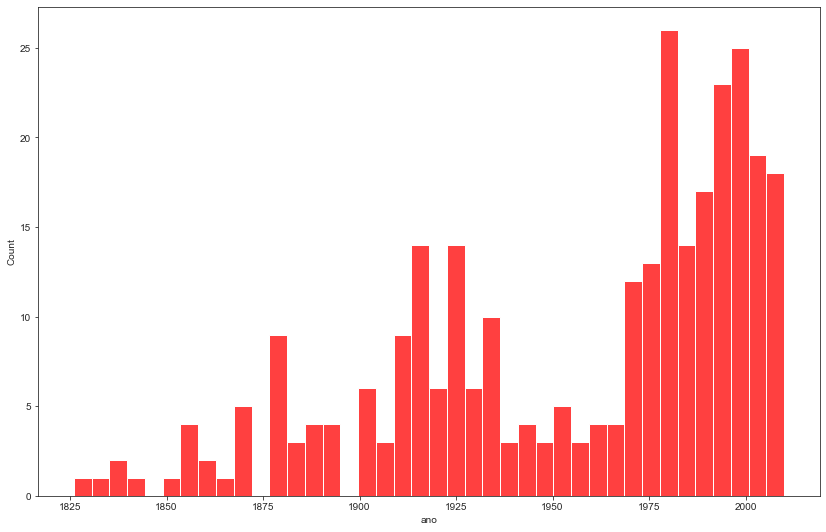

In [ ]:
plt.figure(figsize=(14,9))
sns.despine(offset=10, trim=True)
sns.set_style("ticks")
sns.histplot(data=df, x="ano", bins=40, color='red')
plt.plot()

[]

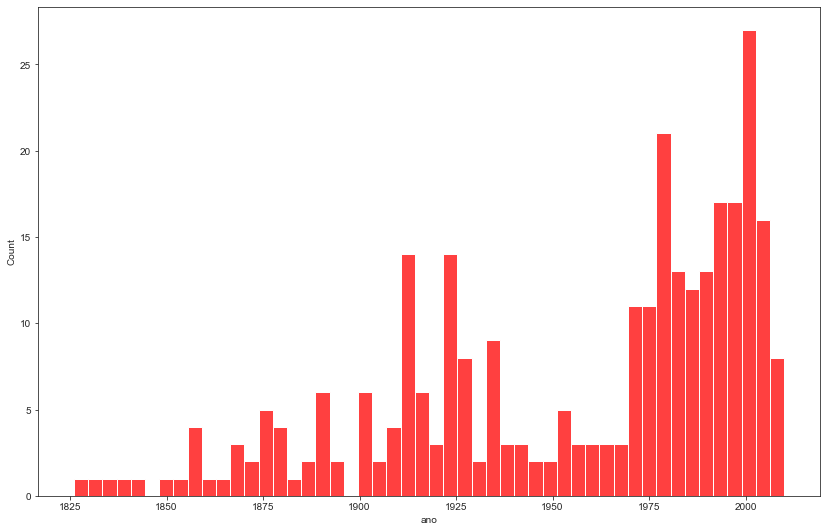

In [ ]:
plt.figure(figsize=(14,9))
sns.despine(offset=10, trim=True)
sns.set_style("ticks")
sns.histplot(data=df, x="ano", bins=50, color='red')
plt.plot()

Podemos criar um dicionário unindo duas colunas, ele apresentará uma "chave" e seu "valor", representados pelas duas variáveis de escolha.  
Isto é interessante para isolar áreas de interesse e, dependendo da análise, pode facilitar a implementação da metodologia aplicada.

In [ ]:
area_dict = dict(zip(df.autor, df.ano))
area_dict

{'Yates Bonnan Neveling Chinsamy and Blackbeard 2010 ': 2010,
 'Bonaparte and Novas ': 1985,
 'Sampson  ': 1995,
 'Perle Norell and Clark ': 1999,
 'Stovall and Langston ': 1950,
 'Stromer ': 1915,
 'Sereno Wilson Larsson Dutheil and Sues ': 1944,
 'Peng ': 1990,
 'Gilmore ': 1913,
 'Ryan 2007': 2007,
 'Lamb ': 1914,
 'Kurzanov ': 1992,
 'Marsh ': 1889,
 'Bonaparte ': 1979,
 'Salgado and Bonaparte ': 1991,
 'Le Loeuff ': 1995,
 'Cabrera ': 1947,
 'Brown ': 1912,
 'Barsbold ': 1986,
 'von Huene ': 1927,
 'Sanz Buscalioni Casanovas and Sanafé ': 1987,
 'Rozhdestvensky ': 1966,
 'Dong and Azuma ': 1990,
 'Mayer ': 1861,
 'Russell ': 1970,
 'Bonaparte and Coria ': 1993,
 'Parks ': 1922,
 'Rich and Rich ': 1989,
 'Coria Chiappe and Dingus ': 2002,
 'Longman ': 1926,
 'Dodson ': 1986,
 'Maryanska and Osmolska ': 1975,
 'Burnham Derstler Currie Bakker Zhou and Ostrom ': 2000,
 'Jain Kutty Roy-Chowdhury and Chatterjee ': 1975,
 'Charig and Milner ': 1987,
 'Paul ': 1988,
 'Xu Tang and Wang ': 

In [262]:
print(area_dict.get("Marsh ")) #trará seu valor

1889


Outra possibilidade é transformar nossos dados em conjuntos "arrays". Normalmente se faz isso na hora de organizar nossos dados para implementar algum modelo preditivo.  

In [ ]:
arr = df["ano"].to_numpy()
arr = arr[~pd.isnull(arr)] #removendo nans
print(arr)

[1826 1833 1837 1838 1843 1850 1854 1856 1857 1858 1859 1861 1866 1868
 1869 1869 1871 1871 1877 1877 1877 1877 1877 1878 1879 1881 1881 1884
 1885 1885 1889 1889 1890 1890 1891 1891 1893 1894 1900 1902 1902 1902
 1903 1903 1905 1905 1908 1910 1910 1910 1911 1912 1913 1913 1913 1913
 1914 1914 1914 1914 1914 1914 1914 1914 1915 1915 1915 1916 1917 1917
 1919 1920 1921 1922 1922 1922 1923 1923 1923 1923 1924 1924 1924 1924
 1924 1924 1925 1926 1926 1927 1928 1928 1929 1929 1929 1931 1932 1933
 1933 1933 1933 1933 1933 1934 1936 1936 1937 1939 1939 1941 1942 1943
 1944 1947 1950 1950 1952 1953 1953 1954 1954 1955 1956 1958 1960 1960
 1962 1963 1964 1964 1966 1968 1969 1970 1970 1970 1970 1970 1971 1972
 1972 1972 1973 1973 1974 1974 1974 1974 1975 1975 1975 1975 1976 1976
 1976 1977 1977 1978 1978 1978 1979 1979 1979 1979 1979 1979 1979 1979
 1979 1979 1979 1980 1980 1980 1980 1980 1981 1981 1981 1981 1981 1982
 1982 1983 1983 1983 1983 1984 1984 1985 1985 1985 1985 1986 1986 1986
 1986 

E assim termina essa análise. Um pequeno dataset nos possibilitou uma boa quantidade de insights, porém dizer que o conjunto foi totalmente explorado não seria verdade.
Dentre outras análises, poderiam ser explorados de forma mais profunda:
* A relação das espécies a cada período;
* Um chart de mapas, caso se utilizasse dados de long. e lat.;
* Relação de cada autor com sua espécie descrita;
* dentre outros.

Este projeto certamente ampliou minha capacidade exploratória e meu conhecimento sobre o conteúdo analisado, e espero assim também gerar valor para quem tenha lido ;)

<center><img alt="Close call." src="https://64.media.tumblr.com/ba2cdc15905b15d56b8874c37224918c/tumblr_nx3px96F5A1rwfctbo5_500.gifv" width="500" height="205" data-highres="https://64.media.tumblr.com/ba2cdc15905b15d56b8874c37224918c/tumblr_nx3px96F5A1rwfctbo5_640.gifv" data-width="600" data-height="246" class=""><center>